In [1]:
#import pandas and seaborn library
import pandas as pd
import seaborn as sns
from datetime import datetime
import numpy as np

# Data Cleaning - looking through nba_players_v4.csv

### Research Question

Is there a relationship between a NCAA basketball player’s statistics (height, wingspan, collegiate league performance, efficiency ratings, offensive/defensive scores) and their success/player efficiency rating in the NBA?

In [2]:
#First let us clean the web scraped nba_players_v4 dataset, which has all the NBA and NCAA (collegiate) basketball player data.
players = pd.read_csv('nba_players_w_PER.csv')
players.head()

,Unnamed: 0,url,name,active_from,active_to,position,college,height,weight,birth_date,...,NCAA_ft,NCAA_fgpg,NCAA_fgapg,NCAA_ftpg,NCAA_ftapg,NCAA__3ptpg,NCAA__3ptapg,NCAA__3ptpct,NCAA_efgpct,PER
0,0,/players/a/abdelal01.html,Alaa Abdelnaby,1991,1995,F-C,Duke,6-10,240.0,"June 24, 1968",...,0.728,3.3,5.6,1.8,2.5,0.0,0.0,NaN,NaN,13.0
1,1,/players/a/abdulza01.html,Zaid Abdul-Aziz,1969,1978,C-F,Iowa State,6-9,235.0,"April 7, 1946",...,0.645,7.8,16.8,6.7,10.4,NaN,NaN,NaN,NaN,15.1
2,2,/players/a/abdulka01.html,Kareem Abdul-Jabbar,1970,1989,C,UCLA,7-2,225.0,"April 16, 1947",...,0.628,10.7,16.8,5.0,7.9,NaN,NaN,NaN,NaN,24.6
3,3,/players/a/abdulma02.html,Mahmoud Abdul-Rauf,1991,2001,G,LSU,6-1,162.0,"March 9, 1969",...,0.863,10.4,21.9,5.5,6.4,2.7,7.2,0.372,NaN,15.4
4,4,/players/a/abdulta01.html,Tariq Abdul-Wahad,1998,2003,F,"Michigan, San Jose State",6-6,223.0,"November 3, 1974",...,0.726,4.9,10.4,3.2,4.4,0.6,1.7,0.322,NaN,11.4


In [3]:
#Significant number of columns and listed below are the definitions of each column.
players.columns

Index(['Unnamed: 0', 'url', 'name', 'active_from', 'active_to', 'position',
       'college', 'height', 'weight', 'birth_date', 'NBA_fg%', 'NBA_g_played',
       'NBA_ppg', 'NBA_ft%', 'NBA_fg_per_game', 'NBA_fga_per_game',
       'NBA_ft_per_g', 'NBA_fta_p_g', 'NBA__3ptpg', 'NBA__3ptapg',
       'NBA__3ptpct', 'NBA_efgpct', 'NCAA_fgpct', 'NCAA_games', 'NCAA_ppg',
       'NCAA_ft', 'NCAA_fgpg', 'NCAA_fgapg', 'NCAA_ftpg', 'NCAA_ftapg',
       'NCAA__3ptpg', 'NCAA__3ptapg', 'NCAA__3ptpct', 'NCAA_efgpct', 'PER'],
      dtype='object')

The 34 columns of the dataset have the following definitions...

| Column Name | Definition |
| ----------- | ---------- |
| 'Unnamed: 0' | excess column with no meaning, exactly the same as index|
| 'url' | url of the player website from basketball-reference.com/ + 'url'|
| 'name' | name of the player |
| 'active_from' | when they started playing in NBA |
| 'active_to' | when they stopped playing in NBA |
| 'position' | position that they played in the NBA |
| 'college' | college that player attended |
| 'weight' | weight of the player |
| 'birth_date' | birthdate of player |
| 'NBA_fg%' | NBA field goal percent |
| 'NBA_g_played' | NBA games played |
| 'NBA_ppg' | NBA average points per game |
| 'NBA_ft%' | NBA free throw percent |
| 'NBA_fg_per_game' | NBA average field goals per game |
| 'NBA_fga_per_game' | NBA average field goal attempts per game |
| 'NBA_ft_per_g' | NBA averagefree throws per game |
| 'NBA_fta_p_g' | NBA average free throws attempted per game | 
| ''NBA__3ptpg' | NBA average 3 point points per game | 
| 'NBA__3ptapg' | NBA average 3 point points attempted per game |
| 'NBA_efgpct' | NBA effective field goal percentage |
| 'NCAA_fgpct' | NCAA field goal percent |
| 'NCAA_games' | NCAA games played |
| 'NCAA_ppg' | NCAA average points per game |
| 'NCAA_ft' | NCAA average free throws per game |
| 'NCAA_fgpg' | NCAA averafe field goals per game |
| 'NCAA_fgapg' | NCAA average field goal attempts per game |
| 'NCAA_ftpg' | NCAA average free throws per game |
| 'NCAA_ftapg' | NCAA average free throws attempted per game |
| 'NCAA__3ptpg' | NCAA average 3 points per game |
| 'NCAA__3ptapg' | NCAA average 3 point attempted per game |
| 'NCAA__3ptpct' | NCAA 3 point percent |
| 'NCAA_efgpct' | NCAA effective field goal percent |
| 'PER' | NBA player efficiency rating |

In [4]:
# describing data and looking for any unique trends/patterns
players.describe()

,Unnamed: 0,active_from,active_to,weight,NBA_fg%,NBA_g_played,NBA_ppg,NBA_ft%,NBA_fg_per_game,NBA_fga_per_game,...,NCAA_ppg,NCAA_ft,NCAA_fgpg,NCAA_fgapg,NCAA_ftpg,NCAA_ftapg,NCAA__3ptpg,NCAA__3ptapg,NCAA__3ptpct,NCAA_efgpct
count,4973.000000,4973.000000,4973.000000,4968.000000,4937.000000,4973.000000,4973.000000,4728.000000,4973.000000,4973.000000,...,3287.000000,3280.000000,3287.000000,3259.000000,3287.000000,3279.000000,2042.000000,2042.000000,2100.000000,0.0
mean,2486.000000,1988.063141,1992.266037,209.326490,0.409057,268.871104,6.385642,0.698962,2.438106,5.752202,...,13.702677,0.714109,5.093094,10.461829,2.922848,4.081610,0.913908,2.532321,0.323875,NaN
std,1435.725775,22.329240,23.075182,26.049095,0.108477,310.179579,4.760793,0.140654,1.810070,3.870099,...,4.628367,0.089708,1.804854,3.746143,1.268152,1.684578,0.801617,2.107385,0.132159,NaN
min,0.000000,1947.000000,1947.000000,114.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.600000,0.295000,0.600000,1.200000,0.300000,0.300000,0.000000,0.000000,0.000000,NaN
25%,1243.000000,1971.000000,1974.000000,190.000000,0.366000,31.000000,2.800000,0.633000,1.100000,2.800000,...,10.600000,0.662000,3.900000,7.900000,2.100000,2.900000,0.100000,0.400000,0.298000,NaN
50%,2486.000000,1990.000000,1995.000000,210.000000,0.423000,125.000000,5.200000,0.719000,2.000000,4.900000,...,13.500000,0.722000,4.900000,10.200000,2.800000,3.900000,0.800000,2.400000,0.348000,NaN
75%,3729.000000,2008.000000,2014.000000,225.000000,0.465000,446.000000,8.700000,0.784000,3.300000,7.900000,...,16.400000,0.773000,6.100000,12.600000,3.600000,5.000000,1.500000,4.100000,0.383000,NaN
max,4972.000000,2022.000000,2022.000000,360.000000,1.000000,1611.000000,30.100000,1.000000,12.100000,23.800000,...,44.200000,1.745000,16.700000,38.100000,10.800000,14.400000,4.000000,10.800000,1.000000,NaN


In [5]:
#columns with null values
players.isna().sum()

Unnamed: 0             0
url                    0
name                   0
active_from            0
active_to              0
position               0
college              351
height                 0
weight                 5
birth_date            18
NBA_fg%               36
NBA_g_played           0
NBA_ppg                0
NBA_ft%              245
NBA_fg_per_game        0
NBA_fga_per_game       0
NBA_ft_per_g           0
NBA_fta_p_g            0
NBA__3ptpg          1128
NBA__3ptapg         1128
NBA__3ptpct         1647
NBA_efgpct          1158
NCAA_fgpct          1714
NCAA_games          1686
NCAA_ppg            1686
NCAA_ft             1693
NCAA_fgpg           1686
NCAA_fgapg          1714
NCAA_ftpg           1686
NCAA_ftapg          1694
NCAA__3ptpg         2931
NCAA__3ptapg        2931
NCAA__3ptpct        2873
NCAA_efgpct         4973
PER                    0
dtype: int64

Looking at the null values, we decided to drop the following columns.

- **'NCAA_efgpct'**: collegiate effective field goal percentage which is null for all players.

- **'Unnamed: 0'**: excess column that just has index.


It should also be noted that there are 5 missing values for weight and 18 for birthdate which should not affect our analysis as we can most likely find the values to input with a google search.

In [6]:
#dropping columns
players = players.drop(columns = ['Unnamed: 0','NCAA_efgpct'], axis = 1)
players

,url,name,active_from,active_to,position,college,height,weight,birth_date,NBA_fg%,...,NCAA_ppg,NCAA_ft,NCAA_fgpg,NCAA_fgapg,NCAA_ftpg,NCAA_ftapg,NCAA__3ptpg,NCAA__3ptapg,NCAA__3ptpct,PER
0,/players/a/abdelal01.html,Alaa Abdelnaby,1991,1995,F-C,Duke,6-10,240.0,"June 24, 1968",0.502,...,8.5,0.728,3.3,5.6,1.8,2.5,0.0,0.0,NaN,13.0
1,/players/a/abdulza01.html,Zaid Abdul-Aziz,1969,1978,C-F,Iowa State,6-9,235.0,"April 7, 1946",0.428,...,22.3,0.645,7.8,16.8,6.7,10.4,NaN,NaN,NaN,15.1
2,/players/a/abdulka01.html,Kareem Abdul-Jabbar,1970,1989,C,UCLA,7-2,225.0,"April 16, 1947",0.559,...,26.4,0.628,10.7,16.8,5.0,7.9,NaN,NaN,NaN,24.6
3,/players/a/abdulma02.html,Mahmoud Abdul-Rauf,1991,2001,G,LSU,6-1,162.0,"March 9, 1969",0.442,...,29.0,0.863,10.4,21.9,5.5,6.4,2.7,7.2,0.372,15.4
4,/players/a/abdulta01.html,Tariq Abdul-Wahad,1998,2003,F,"Michigan, San Jose State",6-6,223.0,"November 3, 1974",0.417,...,13.6,0.726,4.9,10.4,3.2,4.4,0.6,1.7,0.322,11.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4968,/players/z/zizican01.html,Ante Žižić,2018,2020,F-C,NaN,6-10,266.0,"January 4, 1997",0.581,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.4
4969,/players/z/zoetji01.html,Jim Zoet,1983,1983,C,Kent State University,7-1,240.0,"December 20, 1953",0.200,...,3.2,0.429,1.4,2.9,0.4,1.0,NaN,NaN,NaN,-0.8
4970,/players/z/zopfbi01.html,Bill Zopf,1971,1971,G,Duquesne,6-1,170.0,"June 7, 1948",0.363,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.6
4971,/players/z/zubaciv01.html,Ivica Zubac,2017,2022,C,NaN,7-0,240.0,"March 18, 1997",0.592,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.3


In [7]:
#finding who are the ones that have missing weight values
weight_missing = players[players['weight'].isnull() == True]
weight_missing_index = weight_missing.index
#dropping these players since its old and they didn't play for long. 
players = players.drop(index=weight_missing_index, axis=0).reset_index()

The weights of these players cannot be found anywhere. The time that they were active is also only up to a year where growth may not have been shown among their games. The time frame in which these players played is beyond the scope of our project since they played in the 50s and 60s so we will drop these values.

In [8]:
#finding birthdays that are missing
birthday_missing = players[players['birth_date'].isnull() == True]
#dropping these rows cause we can't find the birthdays for them and their active time frame is within the same year.
birthday_missing_index = birthday_missing.index
players = players.drop(index = birthday_missing_index, axis = 0).reset_index()

After looking at the missing birthdates and heights, these players are those that have played before the 1970's which is beyond the scope of our project. Therefore, they are not needed for our analysis so will be dropped as well.

In [9]:
#adding a column that tells us how long players play in NBA
players['years_played_NBA'] = players['active_to']-players['active_from']

In [10]:
#taking a look at the columns we have now
players.columns

Index(['level_0', 'index', 'url', 'name', 'active_from', 'active_to',
       'position', 'college', 'height', 'weight', 'birth_date', 'NBA_fg%',
       'NBA_g_played', 'NBA_ppg', 'NBA_ft%', 'NBA_fg_per_game',
       'NBA_fga_per_game', 'NBA_ft_per_g', 'NBA_fta_p_g', 'NBA__3ptpg',
       'NBA__3ptapg', 'NBA__3ptpct', 'NBA_efgpct', 'NCAA_fgpct', 'NCAA_games',
       'NCAA_ppg', 'NCAA_ft', 'NCAA_fgpg', 'NCAA_fgapg', 'NCAA_ftpg',
       'NCAA_ftapg', 'NCAA__3ptpg', 'NCAA__3ptapg', 'NCAA__3ptpct', 'PER',
       'years_played_NBA'],
      dtype='object')

In [11]:
#putting into consistent data types
players.dtypes

level_0               int64
index                 int64
url                  object
name                 object
active_from           int64
active_to             int64
position             object
college              object
height               object
weight              float64
birth_date           object
NBA_fg%             float64
NBA_g_played          int64
NBA_ppg             float64
NBA_ft%             float64
NBA_fg_per_game     float64
NBA_fga_per_game    float64
NBA_ft_per_g        float64
NBA_fta_p_g         float64
NBA__3ptpg          float64
NBA__3ptapg         float64
NBA__3ptpct         float64
NBA_efgpct          float64
NCAA_fgpct          float64
NCAA_games          float64
NCAA_ppg            float64
NCAA_ft             float64
NCAA_fgpg           float64
NCAA_fgapg          float64
NCAA_ftpg           float64
NCAA_ftapg          float64
NCAA__3ptpg         float64
NCAA__3ptapg        float64
NCAA__3ptpct        float64
PER                  object
years_played_NBA    

In [12]:
#casting college column to string type
players['college'] = players['college'].astype(str)
#casting position to string type
players['position'] = players['position'].astype(str)
#casting height to int type
def height_inches(height):
    feet = int(height[0])
    inches = 0
    if len(height) == 4:
        inches = int(height[2:4] )
    if len(height) == 3:
        inches = int(height[2])
    return (feet * 12) + inches
players['height'] = players['height'].apply(height_inches)

In [13]:
#Since the birthdays are written out in readable format, we want something that we can work with in pandas.
players['birth_date']

0           June 24, 1968
1           April 7, 1946
2          April 16, 1947
3           March 9, 1969
4        November 3, 1974
              ...        
4946      January 4, 1997
4947    December 20, 1953
4948         June 7, 1948
4949       March 18, 1997
4950    December 19, 1919
Name: birth_date, Length: 4951, dtype: object

In [14]:
#changing written birthdates into numerical ones that we can manipulate in the dataframe
def birthdate(day):
    day = day.replace(',', '')
    day = day.lower()

    output = datetime.strptime(day, '%B %d %Y')
    return output.date()

players['birth_date'] = players['birth_date'].apply(birthdate)

In [15]:
players

,level_0,index,url,name,active_from,active_to,position,college,height,weight,...,NCAA_ft,NCAA_fgpg,NCAA_fgapg,NCAA_ftpg,NCAA_ftapg,NCAA__3ptpg,NCAA__3ptapg,NCAA__3ptpct,PER,years_played_NBA
0,0,0,/players/a/abdelal01.html,Alaa Abdelnaby,1991,1995,F-C,Duke,82,240.0,...,0.728,3.3,5.6,1.8,2.5,0.0,0.0,NaN,13.0,4
1,1,1,/players/a/abdulza01.html,Zaid Abdul-Aziz,1969,1978,C-F,Iowa State,81,235.0,...,0.645,7.8,16.8,6.7,10.4,NaN,NaN,NaN,15.1,9
2,2,2,/players/a/abdulka01.html,Kareem Abdul-Jabbar,1970,1989,C,UCLA,86,225.0,...,0.628,10.7,16.8,5.0,7.9,NaN,NaN,NaN,24.6,19
3,3,3,/players/a/abdulma02.html,Mahmoud Abdul-Rauf,1991,2001,G,LSU,73,162.0,...,0.863,10.4,21.9,5.5,6.4,2.7,7.2,0.372,15.4,10
4,4,4,/players/a/abdulta01.html,Tariq Abdul-Wahad,1998,2003,F,"Michigan, San Jose State",78,223.0,...,0.726,4.9,10.4,3.2,4.4,0.6,1.7,0.322,11.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4946,4963,4968,/players/z/zizican01.html,Ante Žižić,2018,2020,F-C,nan,82,266.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.4,2
4947,4964,4969,/players/z/zoetji01.html,Jim Zoet,1983,1983,C,Kent State University,85,240.0,...,0.429,1.4,2.9,0.4,1.0,NaN,NaN,NaN,-0.8,0
4948,4965,4970,/players/z/zopfbi01.html,Bill Zopf,1971,1971,G,Duquesne,73,170.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.6,0
4949,4966,4971,/players/z/zubaciv01.html,Ivica Zubac,2017,2022,C,nan,84,240.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.3,5


In [16]:
#cleaning up player columns
players = players.rename(columns={'name':'player_name','NBA_fg_per_game':'NBA_fgpg',
                        'NBA_fga_per_game':'NBA_fgapg','NBA_ft_per_g':'NBA_ftpg','NBA_fta_p_g':'NBA_ftapg',
                       'NBA__3ptpg':'NBA_3ptpg','NBA__3ptapg':'NBA_3ptapg','NBA__3ptpct':'NBA_3pt%',
                       'NBA_efgpct':'NBA_efg%','NCAA_fgpct':'NCAA_fg%','NCAA__3ptpg':'NCAA_3ptpg',
                       'NCAA__3ptapg':'NCAA_3ptapg','NCAA__3ptpct':'NCAA_3pt%','PER':'NBA_per'})
#organize the dataframe and relabel columns
columns = ['player_name','height','weight','birth_date','active_from','active_to','position',
           'years_played_NBA','college','NBA_g_played', 'NBA_per', 'NBA_fg%', 'NBA_ppg',
       'NBA_ft%', 'NBA_fgpg', 'NBA_fgapg', 'NBA_ftpg',
       'NBA_ftapg', 'NBA_3ptpg', 'NBA_3ptapg', 'NBA_3pt%', 'NBA_efg%',
       'NCAA_fg%', 'NCAA_games', 'NCAA_ppg', 'NCAA_ft', 'NCAA_fgpg',
       'NCAA_fgapg', 'NCAA_ftpg', 'NCAA_ftapg', 'NCAA_3ptpg', 'NCAA_3ptapg',
       'NCAA_3pt%']
players = players[columns]
players.head()

,player_name,height,weight,birth_date,active_from,active_to,position,years_played_NBA,college,NBA_g_played,...,NCAA_games,NCAA_ppg,NCAA_ft,NCAA_fgpg,NCAA_fgapg,NCAA_ftpg,NCAA_ftapg,NCAA_3ptpg,NCAA_3ptapg,NCAA_3pt%
0,Alaa Abdelnaby,82,240.0,1968-06-24,1991,1995,F-C,4,Duke,256,...,134.0,8.5,0.728,3.3,5.6,1.8,2.5,0.0,0.0,NaN
1,Zaid Abdul-Aziz,81,235.0,1946-04-07,1969,1978,C-F,9,Iowa State,505,...,75.0,22.3,0.645,7.8,16.8,6.7,10.4,NaN,NaN,NaN
2,Kareem Abdul-Jabbar,86,225.0,1947-04-16,1970,1989,C,19,UCLA,1560,...,88.0,26.4,0.628,10.7,16.8,5.0,7.9,NaN,NaN,NaN
3,Mahmoud Abdul-Rauf,73,162.0,1969-03-09,1991,2001,G,10,LSU,586,...,64.0,29.0,0.863,10.4,21.9,5.5,6.4,2.7,7.2,0.372
4,Tariq Abdul-Wahad,78,223.0,1974-11-03,1998,2003,F,5,"Michigan, San Jose State",236,...,87.0,13.6,0.726,4.9,10.4,3.2,4.4,0.6,1.7,0.322


In [17]:
#After renaming the columns, we are left with these renamed columns which we will use for our analysis.
players.columns

Index(['player_name', 'height', 'weight', 'birth_date', 'active_from',
       'active_to', 'position', 'years_played_NBA', 'college', 'NBA_g_played',
       'NBA_per', 'NBA_fg%', 'NBA_ppg', 'NBA_ft%', 'NBA_fgpg', 'NBA_fgapg',
       'NBA_ftpg', 'NBA_ftapg', 'NBA_3ptpg', 'NBA_3ptapg', 'NBA_3pt%',
       'NBA_efg%', 'NCAA_fg%', 'NCAA_games', 'NCAA_ppg', 'NCAA_ft',
       'NCAA_fgpg', 'NCAA_fgapg', 'NCAA_ftpg', 'NCAA_ftapg', 'NCAA_3ptpg',
       'NCAA_3ptapg', 'NCAA_3pt%'],
      dtype='object')

In [18]:
#nba players that did not go to college
no_college = players[players['college'] == 'nan']
no_college

#add a new column that tells whether or not they went to college
def going_college(val):
    if val == 'nan':
        return False
    else:
        return True

players['go_college'] = players['college'].apply(going_college)

## adjusting null values

The '3 point shot' was not adopted into the NBA until 1980. This means that players that played before this time cannot must not have shot a 3 point shot. So we can replace their null values with 0's since they didn't shoot a 3 point shot.

The same applies for games for NCAA games,except that the NCAA adopted the 3 point shot in 1986.



https://www.usab.com/youth/news/2011/06/the-history-of-the-3-pointer.aspx

In [19]:
# if they scored 0 field goals, free throws, 3 point, then their percentages are 0.
players.loc[((players['NBA_fg%'].isna()) & (players['NBA_fgpg'] == 0)), 'NBA_fg%'] = 0
players.loc[((players['NBA_ft%'].isna()) & (players['NBA_ftpg'] == 0)), 'NBA_ft%'] = 0
players.loc[((players['NBA_3pt%'].isna()) & (players['NBA_3ptpg'] == 0)), 'NBA_3pt%'] = 0
players.loc[((players['NBA_efg%'].isna()) & (players['NBA_fgpg'] == 0)), 'NBA_efg%'] = 0


In [20]:
# player years that did not have nba 3 point data
players[players['NBA_3ptpg'].isna()]['active_to'].sort_values().unique()

array([1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957,
       1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968,
       1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979])

In [21]:
players.columns

Index(['player_name', 'height', 'weight', 'birth_date', 'active_from',
       'active_to', 'position', 'years_played_NBA', 'college', 'NBA_g_played',
       'NBA_per', 'NBA_fg%', 'NBA_ppg', 'NBA_ft%', 'NBA_fgpg', 'NBA_fgapg',
       'NBA_ftpg', 'NBA_ftapg', 'NBA_3ptpg', 'NBA_3ptapg', 'NBA_3pt%',
       'NBA_efg%', 'NCAA_fg%', 'NCAA_games', 'NCAA_ppg', 'NCAA_ft',
       'NCAA_fgpg', 'NCAA_fgapg', 'NCAA_ftpg', 'NCAA_ftapg', 'NCAA_3ptpg',
       'NCAA_3ptapg', 'NCAA_3pt%', 'go_college'],
      dtype='object')

In [22]:
# making 3 point shot values equal 0 since 3 point was not used before 1980 NBA games
players.loc[((players['NBA_3ptpg'].isna())&(players['active_from']<1980)), ['NBA_3ptpg','NBA_3pt%','NBA_3ptapg']] = 0

#making 3 point shot values equal to 0 since 3 point was not used before 1987 NCAA games
players.loc[((players['NCAA_3ptpg'].isna())&(players['active_from']<1987)), ['NCAA_3ptpg','NCAA_3ptapg', 'NCAA_3pt%']] = 0

In [23]:
players.isna().sum()

player_name            0
height                 0
weight                 0
birth_date             0
active_from            0
active_to              0
position               0
years_played_NBA       0
college                0
NBA_g_played           0
NBA_per                0
NBA_fg%                0
NBA_ppg                0
NBA_ft%                0
NBA_fgpg               0
NBA_fgapg              0
NBA_ftpg               0
NBA_ftapg              0
NBA_3ptpg              0
NBA_3ptapg             0
NBA_3pt%               0
NBA_efg%            1091
NCAA_fg%            1692
NCAA_games          1664
NCAA_ppg            1664
NCAA_ft             1671
NCAA_fgpg           1664
NCAA_fgapg          1692
NCAA_ftpg           1664
NCAA_ftapg          1672
NCAA_3ptpg           656
NCAA_3ptapg          656
NCAA_3pt%            617
go_college             0
dtype: int64

In [24]:
#players that did not go to college and have null ncaa games, meaning they did not play in the NCAA
players.loc[((players['go_college'] == False)&(players['NCAA_games'].isna())), ['NCAA_fg%', 'NCAA_games', 'NCAA_ppg', 'NCAA_ft',
       'NCAA_fgpg', 'NCAA_fgapg', 'NCAA_ftpg', 'NCAA_ftapg', 'NCAA_3ptpg',
       'NCAA_3ptapg', 'NCAA_3pt%']] = 0

In [25]:
players[players['NCAA_3ptpg'].isna()]

,player_name,height,weight,birth_date,active_from,active_to,position,years_played_NBA,college,NBA_g_played,...,NCAA_ppg,NCAA_ft,NCAA_fgpg,NCAA_fgapg,NCAA_ftpg,NCAA_ftapg,NCAA_3ptpg,NCAA_3ptapg,NCAA_3pt%,go_college
13,Mark Acres,83,220.0,1962-11-15,1988,1993,F-C,5,Oral Roberts,375,...,18.5,0.696,7.3,12.9,4.0,5.7,NaN,NaN,NaN,True
24,Rafael Addison,79,215.0,1964-07-22,1987,1997,F-G,10,Syracuse,379,...,14.9,0.763,6.2,11.6,2.5,3.3,NaN,NaN,NaN,True
40,Mark Alarie,80,217.0,1963-12-11,1987,1991,F,4,Duke,325,...,16.1,0.797,6.2,11.3,3.6,4.5,NaN,NaN,0.000,True
56,Steve Alford,74,183.0,1964-11-23,1988,1991,G,3,Indiana,169,...,19.5,0.898,7.2,13.5,4.3,4.8,NaN,NaN,0.530,True
66,Randy Allen,80,220.0,1965-01-26,1989,1990,F,1,Florida State,70,...,12.5,0.615,5.1,10.5,2.2,3.6,NaN,NaN,0.000,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4890,Brad Wright,83,225.0,1962-03-26,1987,1988,F,1,UCLA,16,...,5.6,0.617,2.1,4.0,1.4,2.3,NaN,NaN,NaN,True
4896,Howard Wright,80,220.0,1967-12-20,1991,1993,F,2,Stanford,19,...,12.9,0.630,4.8,8.6,3.3,5.3,NaN,NaN,0.000,True
4910,A.J. Wynder,74,180.0,1964-09-11,1991,1991,G,0,"UMass, Fairfield",6,...,11.1,0.832,4.1,8.3,2.8,3.3,NaN,NaN,0.286,True
4924,Perry Young,77,210.0,1963-08-04,1987,1987,G,0,Virginia Tech,9,...,14.7,0.689,5.6,10.8,3.5,5.1,NaN,NaN,NaN,True


In [26]:
players[players['NCAA_3ptpg'].isna()]

,player_name,height,weight,birth_date,active_from,active_to,position,years_played_NBA,college,NBA_g_played,...,NCAA_ppg,NCAA_ft,NCAA_fgpg,NCAA_fgapg,NCAA_ftpg,NCAA_ftapg,NCAA_3ptpg,NCAA_3ptapg,NCAA_3pt%,go_college
13,Mark Acres,83,220.0,1962-11-15,1988,1993,F-C,5,Oral Roberts,375,...,18.5,0.696,7.3,12.9,4.0,5.7,NaN,NaN,NaN,True
24,Rafael Addison,79,215.0,1964-07-22,1987,1997,F-G,10,Syracuse,379,...,14.9,0.763,6.2,11.6,2.5,3.3,NaN,NaN,NaN,True
40,Mark Alarie,80,217.0,1963-12-11,1987,1991,F,4,Duke,325,...,16.1,0.797,6.2,11.3,3.6,4.5,NaN,NaN,0.000,True
56,Steve Alford,74,183.0,1964-11-23,1988,1991,G,3,Indiana,169,...,19.5,0.898,7.2,13.5,4.3,4.8,NaN,NaN,0.530,True
66,Randy Allen,80,220.0,1965-01-26,1989,1990,F,1,Florida State,70,...,12.5,0.615,5.1,10.5,2.2,3.6,NaN,NaN,0.000,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4890,Brad Wright,83,225.0,1962-03-26,1987,1988,F,1,UCLA,16,...,5.6,0.617,2.1,4.0,1.4,2.3,NaN,NaN,NaN,True
4896,Howard Wright,80,220.0,1967-12-20,1991,1993,F,2,Stanford,19,...,12.9,0.630,4.8,8.6,3.3,5.3,NaN,NaN,0.000,True
4910,A.J. Wynder,74,180.0,1964-09-11,1991,1991,G,0,"UMass, Fairfield",6,...,11.1,0.832,4.1,8.3,2.8,3.3,NaN,NaN,0.286,True
4924,Perry Young,77,210.0,1963-08-04,1987,1987,G,0,Virginia Tech,9,...,14.7,0.689,5.6,10.8,3.5,5.1,NaN,NaN,NaN,True


The '3 point shot' was not adopted into the NBA until 1980. This means that players that played before this time cannot must not have shot a 3 point shot. So we can replace their null values with 0's since they didn't shoot a 3 point shot.

The same applies for games for NCAA games,except that the NCAA adopted the 3 point shot in 1986.



https://www.usab.com/youth/news/2011/06/the-history-of-the-3-pointer.aspx

In [27]:
#many players listed here did not play in the NCAA, but went to college. A vast majority instead played in the junior college basketball league,played in another country, or signed with different leagues.
players[(players['NCAA_games'].isna())&(players['go_college']==True)].sort_values('active_from')

,player_name,height,weight,birth_date,active_from,active_to,position,years_played_NBA,college,NBA_g_played,...,NCAA_ppg,NCAA_ft,NCAA_fgpg,NCAA_fgapg,NCAA_ftpg,NCAA_ftapg,NCAA_3ptpg,NCAA_3ptapg,NCAA_3pt%,go_college
8,John Abramovic,75,195.0,1919-02-09,1947,1948,F,1,Salem University,56,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,True
2759,Press Maravich,72,185.0,1915-08-29,1947,1947,G,0,Davis & Elkins College,51,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,True
2748,Frank Mangiapane,70,195.0,1925-08-05,1947,1947,G,0,NYU,6,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,True
2729,John Mahnken,80,220.0,1922-06-16,1947,1953,C,6,Georgetown,414,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,True
2688,Al Lujack,75,220.0,1920-10-05,1947,1947,F,0,Georgetown,5,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4309,Jared Terrell,75,227.0,1995-02-10,2019,2019,G,0,Rhode Island,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
4313,Emanuel Terry,81,220.0,1996-08-21,2019,2019,F,0,Lincoln Memorial,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
4327,Brodric Thomas,77,185.0,1997-01-28,2021,2022,G,1,Truman State University,34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
3934,Jay Scrubb,77,220.0,2000-09-01,2021,2022,G-F,1,John A. Logan College,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True


In [28]:
players.columns

Index(['player_name', 'height', 'weight', 'birth_date', 'active_from',
       'active_to', 'position', 'years_played_NBA', 'college', 'NBA_g_played',
       'NBA_per', 'NBA_fg%', 'NBA_ppg', 'NBA_ft%', 'NBA_fgpg', 'NBA_fgapg',
       'NBA_ftpg', 'NBA_ftapg', 'NBA_3ptpg', 'NBA_3ptapg', 'NBA_3pt%',
       'NBA_efg%', 'NCAA_fg%', 'NCAA_games', 'NCAA_ppg', 'NCAA_ft',
       'NCAA_fgpg', 'NCAA_fgapg', 'NCAA_ftpg', 'NCAA_ftapg', 'NCAA_3ptpg',
       'NCAA_3ptapg', 'NCAA_3pt%', 'go_college'],
      dtype='object')

In [29]:
#players that did not play in ncaa should have ncaa_games be at 0
no_ncaa_games = players[(players['NCAA_games'].isna())]
players.loc[((players['NCAA_games'].isna())), ['NCAA_fg%', 'NCAA_games', 'NCAA_ppg', 'NCAA_ft',
       'NCAA_fgpg', 'NCAA_fgapg', 'NCAA_ftpg', 'NCAA_ftapg', 'NCAA_3ptpg',
       'NCAA_3ptapg', 'NCAA_3pt%']] = 0

In [30]:
players.isna().sum()

player_name            0
height                 0
weight                 0
birth_date             0
active_from            0
active_to              0
position               0
years_played_NBA       0
college                0
NBA_g_played           0
NBA_per                0
NBA_fg%                0
NBA_ppg                0
NBA_ft%                0
NBA_fgpg               0
NBA_fgapg              0
NBA_ftpg               0
NBA_ftapg              0
NBA_3ptpg              0
NBA_3ptapg             0
NBA_3pt%               0
NBA_efg%            1091
NCAA_fg%              28
NCAA_games             0
NCAA_ppg               0
NCAA_ft                8
NCAA_fgpg              0
NCAA_fgapg            28
NCAA_ftpg              0
NCAA_ftapg             8
NCAA_3ptpg           269
NCAA_3ptapg          269
NCAA_3pt%            230
go_college             0
dtype: int64

In [31]:
# players.to_csv('players_cleaned_dataset.csv')

We were unable to find the remaining null value data for NCAA players. This may be due to players not playing in the NCAA in the first place.

From looking at this subset of the dataset, we can see that there are 348 players that did not go to college who have played in the NBA. This means that these players could have went straight to the league directly from high school or are players from other countries.

## EDA / plots

array([[<AxesSubplot:title={'center':'height'}>,
        <AxesSubplot:title={'center':'weight'}>,
        <AxesSubplot:title={'center':'active_from'}>,
        <AxesSubplot:title={'center':'active_to'}>,
        <AxesSubplot:title={'center':'years_played_NBA'}>],
       [<AxesSubplot:title={'center':'NBA_g_played'}>,
        <AxesSubplot:title={'center':'NBA_fg%'}>,
        <AxesSubplot:title={'center':'NBA_ppg'}>,
        <AxesSubplot:title={'center':'NBA_ft%'}>,
        <AxesSubplot:title={'center':'NBA_fgpg'}>],
       [<AxesSubplot:title={'center':'NBA_fgapg'}>,
        <AxesSubplot:title={'center':'NBA_ftpg'}>,
        <AxesSubplot:title={'center':'NBA_ftapg'}>,
        <AxesSubplot:title={'center':'NBA_3ptpg'}>,
        <AxesSubplot:title={'center':'NBA_3ptapg'}>],
       [<AxesSubplot:title={'center':'NBA_3pt%'}>,
        <AxesSubplot:title={'center':'NBA_efg%'}>,
        <AxesSubplot:title={'center':'NCAA_fg%'}>,
        <AxesSubplot:title={'center':'NCAA_games'}>,
        <Axe

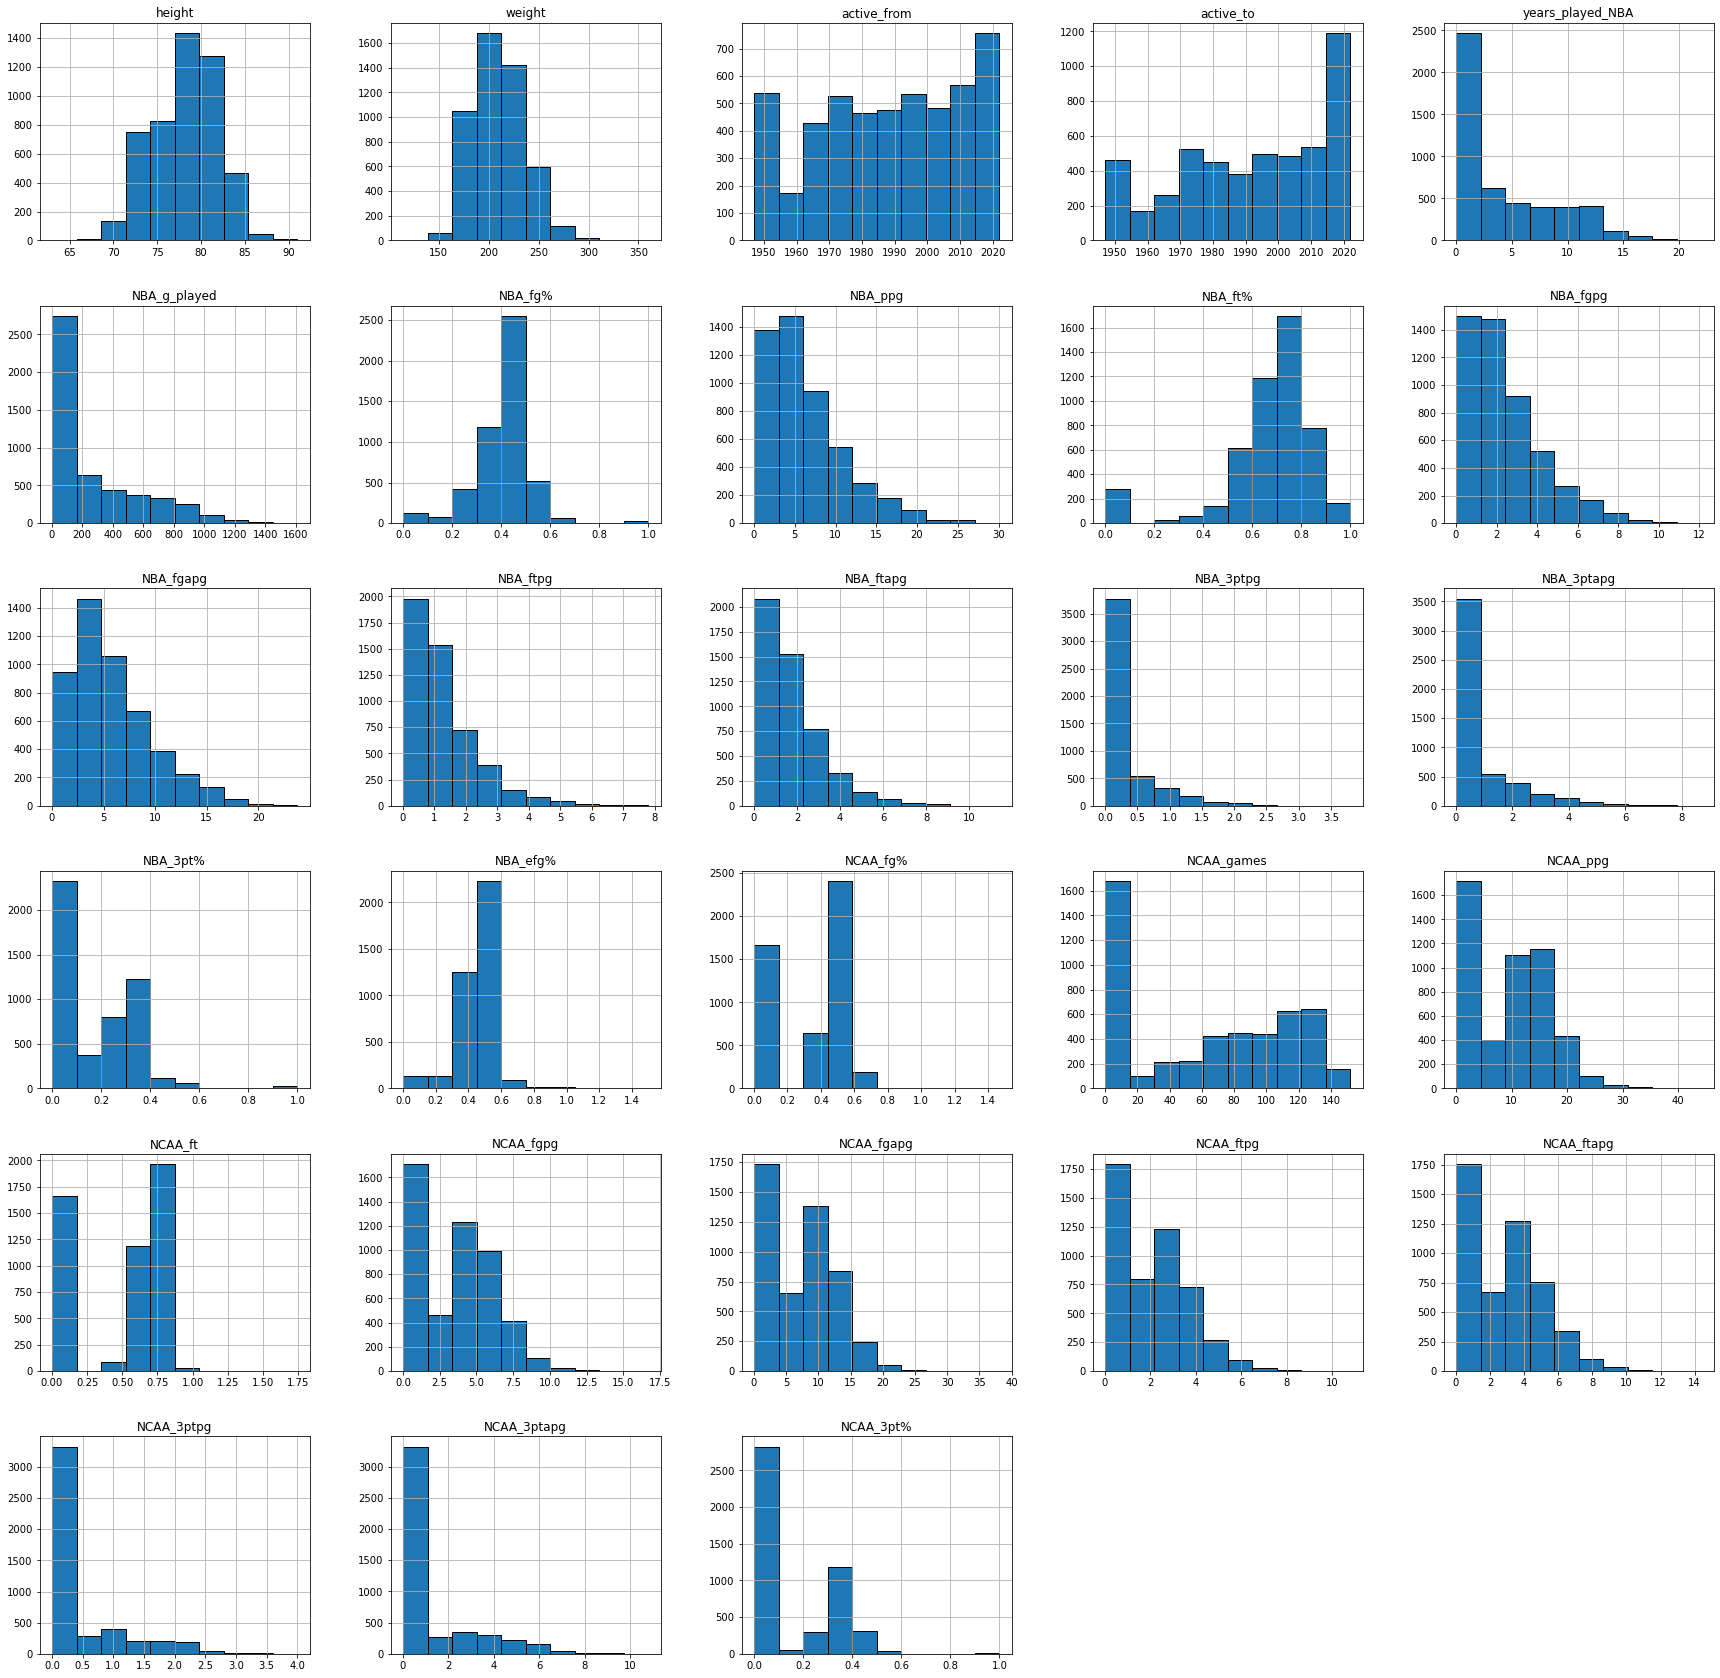

In [32]:
#visualize the distribution of variables

players.hist(edgecolor = 'black', linewidth = 1, figsize = (30,30))

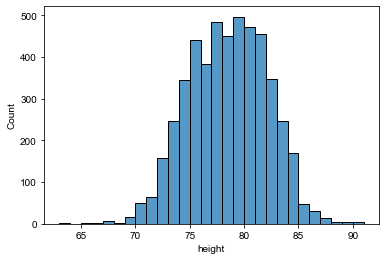

In [33]:
#distribution of height with more bins
sns.histplot(data = players['height'], bins = 28)
sns.set(rc={'figure.figsize':(8,8)})

From the graph on the distribution of heights, players heights is roughly a normal distribution. The minimum in height is around 66 inches and the maximum of heights is around 91 inches. To convert it back to feet this would be 5 feet 5 inches and 7 feet 5 inches. 

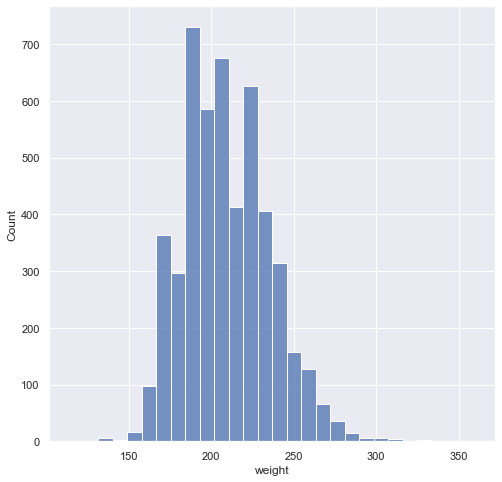

In [34]:
#distribution in weight
sns.histplot(data = players['weight'], bins = 28)
sns.set(rc={'figure.figsize':(8,8)})

Looking at the graph of the distribution in weight, it can be noticed that this is also a histogram that is normally distributed. There does seem to be a slight right skew. This is most likely due to weights being more distributed among heavier players.

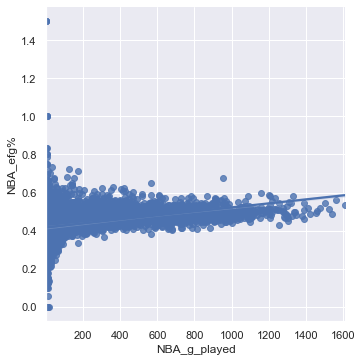

In [35]:
#relation in games played in NBA and efg% (effective field goal percent)
sns.lmplot(x = 'NBA_g_played', y = 'NBA_efg%', data = players)

Plotting the NBA games that players have played against their NBA effective field goal percentage shows that there is a linear correlation between these two variables. This can mean that as players get more experience playing games that they get a higher percentage. To further analyze this, we will look at their scoring as well.

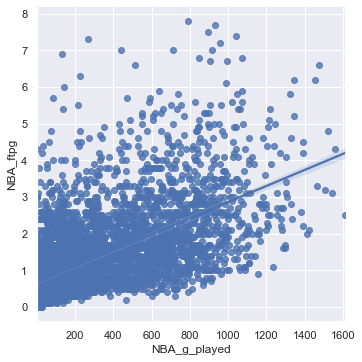

In [36]:
#correlation between games played and free throws
sns.lmplot(x = 'NBA_g_played', y = 'NBA_ftpg', data = players)

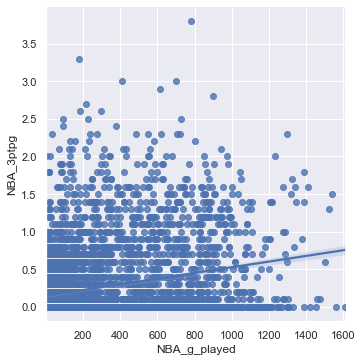

In [37]:
#correlation between games played and 3 point shots
sns.lmplot(x = 'NBA_g_played', y = 'NBA_3ptpg', data = players)

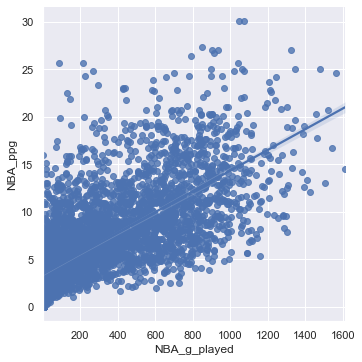

In [38]:
#correlation between games played and points scored overall
sns.lmplot(x = 'NBA_g_played', y = 'NBA_ppg', data = players)

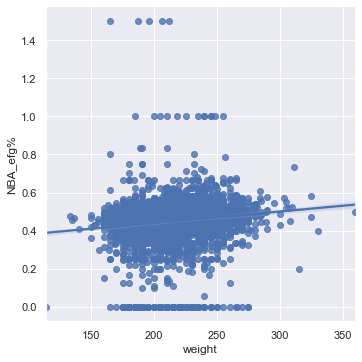

In [39]:
#relation between weight and efg%
sns.lmplot(x = 'weight', y = 'NBA_efg%', data = players)

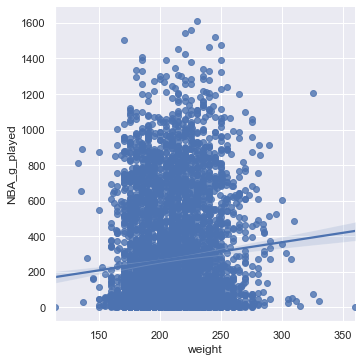

In [40]:
#relation between weight and NBA games played
sns.lmplot(x = 'weight', y = 'NBA_g_played', data = players)

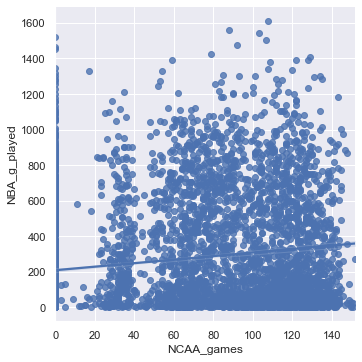

In [41]:
#relation between college games played and NBA
sns.lmplot(x = 'NCAA_games', y = 'NBA_g_played', data = players)

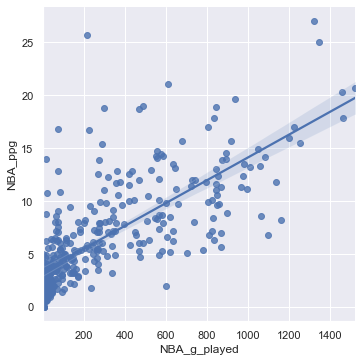

In [42]:
#relation between points per game and the number of games that they played in NBA based on players that did not go to college
sns.lmplot(y = 'NBA_ppg',x = 'NBA_g_played',data = no_college)

Looking at the results of the graph that plots points per game and the number of games that they play based on players that did not go to college, there is a strong positive linear correlation between these variables.

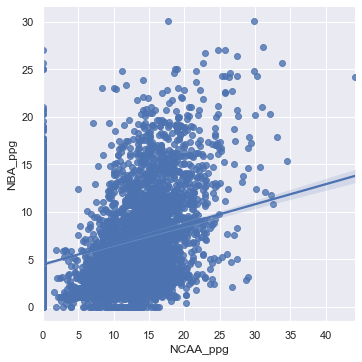

In [43]:
#relation between points scored in NCAA games and NBA games
sns.lmplot( x='NCAA_ppg', y='NBA_ppg', data=players)

As players scored more in their collegiate games, there is a strong positive correlation with scoring more points in the NBA as well. This is something that we plan on looking more into in our project.

### Perhaps the position of the player affect how often they play which could influence scoring and ratings?

In this part, we wanted to look at whether or not playing a particular position influneces the frequency that a player is put in. How often a player is put into the game determines how often they can play which alters the chances they have at scoring more/less as compared to other players.

<AxesSubplot:xlabel='position', ylabel='NBA_g_played'>

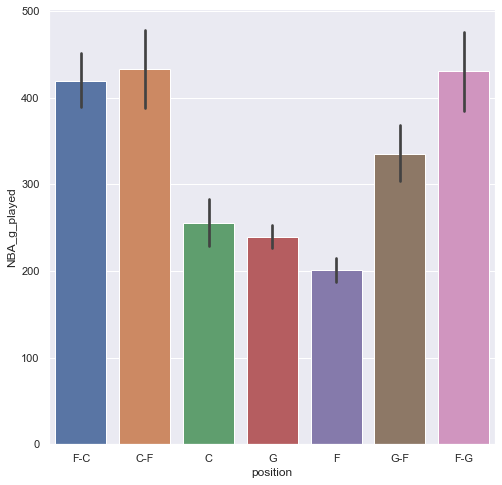

In [44]:
sns.barplot(x ='position', y = 'NBA_g_played', data = players)

<AxesSubplot:xlabel='position', ylabel='NCAA_games'>

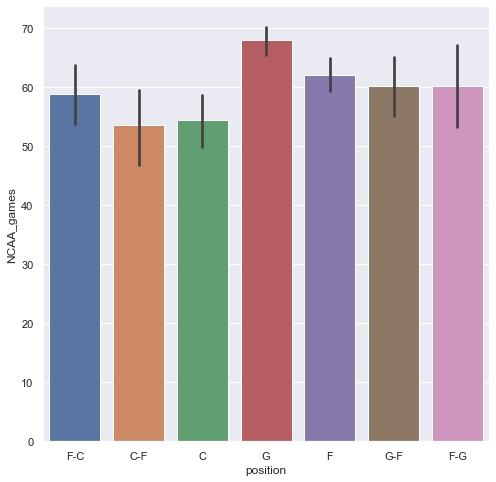

In [45]:
sns.barplot(x='position', y = 'NCAA_games', data = players)

We can see that the position of players in the NBA is not as uniform as when they play in college. There is a uniform distribution among college player positions and the number of games whereas, F-C, C-F, F-G play more than the other positions in the NBA. 

In [46]:
players.columns

Index(['player_name', 'height', 'weight', 'birth_date', 'active_from',
       'active_to', 'position', 'years_played_NBA', 'college', 'NBA_g_played',
       'NBA_per', 'NBA_fg%', 'NBA_ppg', 'NBA_ft%', 'NBA_fgpg', 'NBA_fgapg',
       'NBA_ftpg', 'NBA_ftapg', 'NBA_3ptpg', 'NBA_3ptapg', 'NBA_3pt%',
       'NBA_efg%', 'NCAA_fg%', 'NCAA_games', 'NCAA_ppg', 'NCAA_ft',
       'NCAA_fgpg', 'NCAA_fgapg', 'NCAA_ftpg', 'NCAA_ftapg', 'NCAA_3ptpg',
       'NCAA_3ptapg', 'NCAA_3pt%', 'go_college'],
      dtype='object')

# Model